__author__ = Steven Carriger,
__version__ = Fall 2022,
__date__ = 26/09/22

#Question 1 

__Description__ = The dataset I have chosen is the World Health Organizations data set. I chose the dataset over others because, the dataset had the data I wanted to look into without having to find another.
The data set has roughly 2600 rows without any modifications and has 14 columns.

__Questions__ = I want to find out which countries are most likely to be producing the most CO2 emissions and the similarities among them. A) What continent has the most countries on average producing CO2 emissions? B) Which countries are in the top 5 of producing the most CO2 emissions, which one is the top? C) Is there a relationship between the CO2 emissions and Population annual growth rate, if so, what is the relationship?

__link__ = http://www.exploredata.net/Downloads/WHO-Data-Set

In [149]:
#imports and loading of the DataFrame 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('WHO.csv')
df

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.00,28.00,NaN,NaN,NaN,26088.00,4.00,...,692.50,NaN,NaN,NaN,257.00,231.90,257.00,5740436.00,5.44,22.90
1,Albania,2,2,27.00,98.70,6000.00,93.00,94.00,3172.00,0.60,...,3499.12,4790000000.00,78.14,-2040000000.00,18.47,15.50,18.47,1431793.90,2.21,45.40
2,Algeria,3,3,6.00,69.90,5940.00,94.00,96.00,33351.00,1.50,...,137535.56,69700000000.00,351.36,4700000000.00,40.00,31.20,40.00,20800000.00,2.61,63.30
3,Andorra,4,2,NaN,NaN,NaN,83.00,83.00,74.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.00,67.40,3890.00,49.00,51.00,16557.00,2.80,...,8991.46,14900000000.00,27.13,9140000000.00,164.10,242.50,164.10,8578749.00,4.14,53.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,198,6,25.00,90.30,2310.00,91.00,96.00,86206.00,1.40,...,101826.23,44800000000.00,47.11,-1940000000.00,20.20,23.40,20.20,21900000.00,2.90,26.40
198,West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3780000000.00,NaN,NaN,28.00,25.80,28.00,2596216.00,3.33,71.60
199,Yemen,200,1,83.00,54.10,2090.00,65.00,85.00,21732.00,3.00,...,20148.34,11500000000.00,114.52,831000000.00,82.40,87.90,82.40,5759120.50,4.37,27.30
200,Zambia,201,3,161.00,68.00,1140.00,94.00,90.00,11696.00,1.90,...,2366.94,4090000000.00,10.41,-447000000.00,175.30,163.80,175.30,4017411.00,1.95,35.00


In [150]:
#Question 2 data cleaning, selects the columns that are desired for the data frame and then removes any rows with a null value
# No inconsistencies found within data frame after this general cleanup.
df = df[['Country', 'Continent', 'Population annual growth rate (%)', 'Total_CO2_emissions']]
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

if df.Country.dtype != object:
    print('The column title was the data type:', df.Country.dtype)
    df['Country'] = df['Country'].apply(str)
    print('The column Country is now a:', df.Country.dtype)

pd.options.display.float_format = '{:.2f}'.format

df

,Country,Continent,Population annual growth rate (%),Total_CO2_emissions
0,Afghanistan,1,4.00,692.50
1,Albania,2,0.60,3499.12
2,Algeria,3,1.50,137535.56
4,Angola,3,2.80,8991.46
5,Antigua and Barbuda,4,1.30,421.36
...,...,...,...,...
196,Venezuela,5,1.70,148117.20
197,Vietnam,6,1.40,101826.23
199,Yemen,1,3.00,20148.34
200,Zambia,3,1.90,2366.94


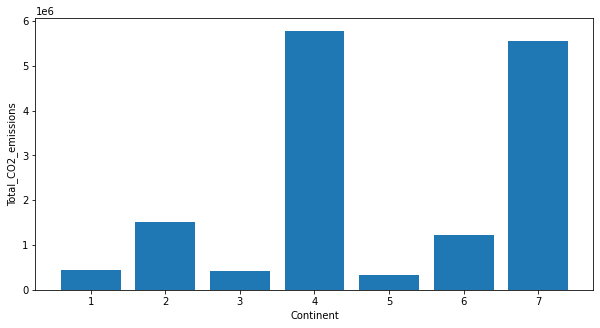

In [151]:
#Question A) Shows the amount of countries producing CO2 by continent.
comparing_data = df[['Continent', 'Total_CO2_emissions']]
comparing_data = comparing_data.dropna()

plt.figure(figsize=(10, 5))
plt.bar(comparing_data['Continent'], comparing_data['Total_CO2_emissions'])
plt.xlabel('Continent')
plt.ylabel('Total_CO2_emissions')

plt.show()

Question A cont.) This graph shows that on average, more North American countries produce more CO2 than any other continent. This is not to be misinterpreted as North American countries produce the most overall. Overall most of the distribution for the world's CO2 emissiona is in Asia, North America, parts of Australia, and Europe.

C:\Users\scarrig1\AppData\Local\Temp\ipykernel_3008\422392760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries]


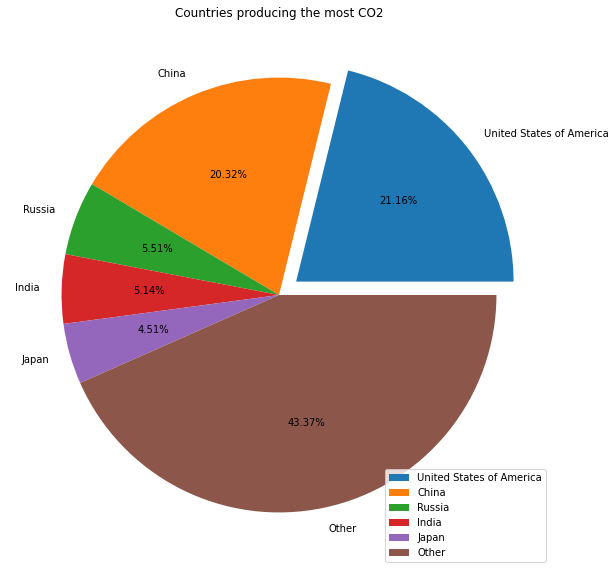

In [162]:
#Question B) Finds which countries are in the top 5 of producing the most CO2 emissions and then displays which one is the number one.

sorted_countries = df.sort_values('Total_CO2_emissions', ascending = False)

top_countries = sorted_countries.head(5)
other_countries = df['Total_CO2_emissions'].sum() - top_countries['Total_CO2_emissions'].sum()
top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries]

plt.figure(figsize=(10, 10))
plt.pie(top_countries.iloc[:, 3], labels = top_countries.iloc[:, 0], autopct = '%.2f%%', explode = [.1,0,0,0,0,0])
plt.title('Countries producing the most CO2')

plt.legend(bbox_to_anchor=(1, 0), loc="lower right")
plt.show()

Question B Cont) The countries that produce the most CO2 are Japan, India, Russia, China, and The United States of America. The United States of America is the number one producer of CO2. The 'Other' in this chart represents the total amount of CO2 that is produced by ALL of the other countries in the world combined. This means that the top five countries producing CO2 are producing way over half of the world's CO2 emissions. So, if we wanted to take any measures to try and decrease the CO2 emission in our atmosphere, it would be best to include at lease one of these five countries to make a noticeable impact.

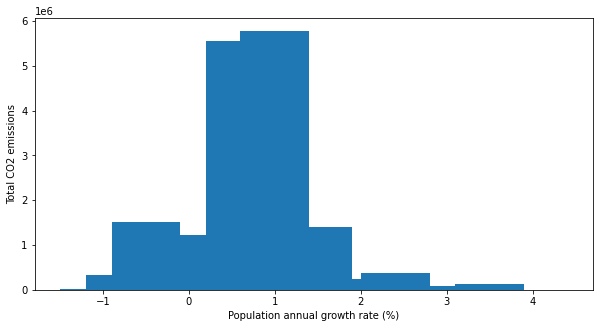

In [157]:
#Question C) determines if there is a relationship between the CO2 emissions and Population annual growth rate.
comparing_data = df[['Total_CO2_emissions', 'Population annual growth rate (%)']]

plt.figure(figsize=(10, 5))
plt.bar(comparing_data['Population annual growth rate (%)'], comparing_data['Total_CO2_emissions'])
plt.xlabel('Population annual growth rate (%)')
plt.ylabel('Total CO2 emissions')
plt.show()

Question C cont) There is a strong correlation between a country's Population annual growth rate and total CO2 emissions when a country averages around .75 - 1% population growth. This means that the likelyhood of a country having a high CO2 emissions rate when their population growth rate is around .75 - 1 is significantly higher than any other range. The bars form almost a bell curve which means that this is normal for a graph. This means that there is some correlation with a moderate positive growth rate and how the country will have a chance to be producing higher emissions. Where as, those that have a lower or larger growth rate will more than likely have lower CO2 emissions.

Question 4)
__Summary__: We can conclude from these results that CO2 emissions does have an impact on our Population's annual growth rate. While we are able to determine that the USA does produce the most CO2 in the world. However, China is still very close to them as well in terms of CO2 emissions. From the observations and data gathered, there seems to be a moderately weak correlation with the location of the country to the CO2 emissions. While yes, it does somewhat matter where a country is located, we can conclude a stable, average growing population anually in a country is more likely to be producing more CO2 than a country with a more unpredicatble population growth rate. One of the things that more than likely is at play here is the more advanced countries both infrastructurally and economically have more stable population growth and it tends to average around 1%. What we are seeing is this claim here especially in Question C where it averages and peaks around 1% for total CO2 emissions. So the common traits among the top CO2 producing countries is having an average annual population growth rate, and being around or in four of the seven continents.

__Failed_To_Find__ = I failed to find a moderately strong correlation between the location of the country to its CO2 emission. While yes, there is a very weak one, I had anticipated a moderately strong one and overestimated the expectations.

__Future_Topics__ = One of the topics I would look further into is even more common trends the top CO2 producing countries have so that I can have an even stronger understanding of what causes a country to start producing so much CO2.

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).

DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else. By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Steven Carriger